In [1]:
# automatically update imports
%load_ext autoreload
%autoreload 2

# For graphs
#%matplotlib inline
#%matplotlib qt

# snippet for relative imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from extract_uses import mapzen
import graph.graph as graph
import networkx as nx

#city_ref = 'avila_spain'
#city_ref = 'grenoble_france'
city_ref = 'lyon_france'

In [3]:
# Create the graph representing the road network of the city
graph.spatialite_network(city_ref)

Road network exists


In [4]:
g = graph.load_graph(city_ref)

In [5]:
if (city_ref == 'grenoble_france'):
    # Get closest nodes
    nodeOfInterest1 = (5.732105 , 45.188835) # Place verdun
    nodeOfInterest2 = (5.740238, 45.187474) # Stade des alpes 
    print('Nodes: Place Verdun, Stade des alpes')

    closest_node1 = graph.get_closest_node(nodeOfInterest1, g)
    print(closest_node1)

    closest_node2 = graph.get_closest_node(nodeOfInterest2, g)
    print(closest_node2)

In [6]:
if (city_ref == 'grenoble_france'):
    cost = nx.shortest_path_length(g, closest_node1[0], closest_node2[0], 'cost')
    length = nx.shortest_path_length(g, closest_node1[0], closest_node2[0], 'length')
    print( "Cost, Length: ", cost ,  length)

    shortest_path = nx.shortest_path(g, closest_node1[0], closest_node2[0], 'cost')
    path_edges = zip(shortest_path,shortest_path[1:])

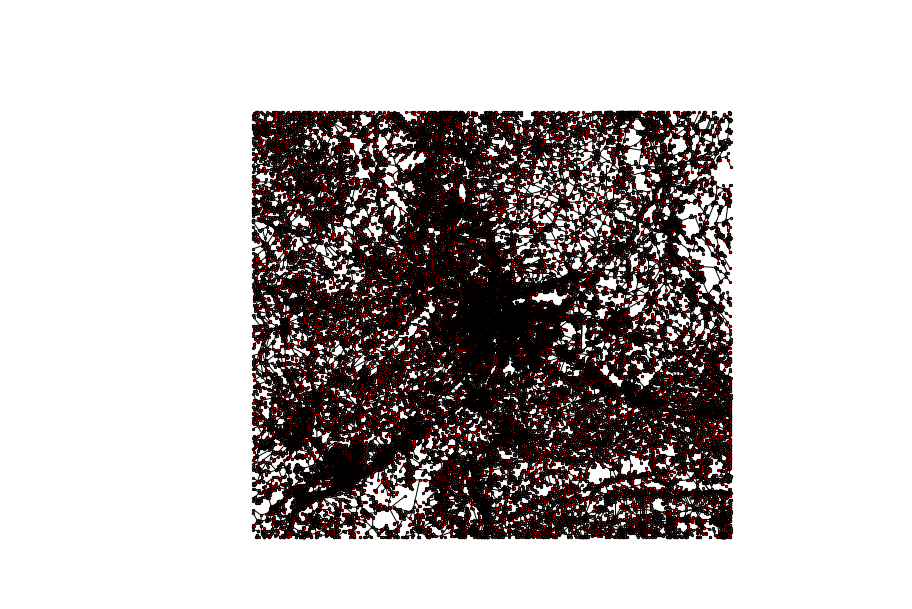

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot
plt.figure(figsize=(12,8))
pos = {idx:(longitude,latitude) for (idx, (longitude,latitude)) in nx.get_node_attributes(g, 'pos').items()}
nx.draw(g, pos, with_labels=False, node_size=5)

if (city_ref == 'grenoble_france'):
    # Shortest path
    nx.draw_networkx_nodes(g,pos,nodelist=shortest_path, node_size=100, node_color='r')
    nx.draw_networkx_edges(g,pos,edgelist=path_edges, width=20, edge_color='r')
    #plt.axis('equal')

plt.show()